In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#path of our dataset
TRAIN_PATH = '/content/drive/MyDrive/dataset/currency'

In [ ]:
import os
takas = os.listdir(TRAIN_PATH)
takas = takas[0:]

In [ ]:
image_size = (250, 120)
batch_size = 128

train_ds= tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds= tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1697 files belonging to 10 classes.
Using 1358 files for training.
Found 1697 files belonging to 10 classes.
Using 339 files for validation.


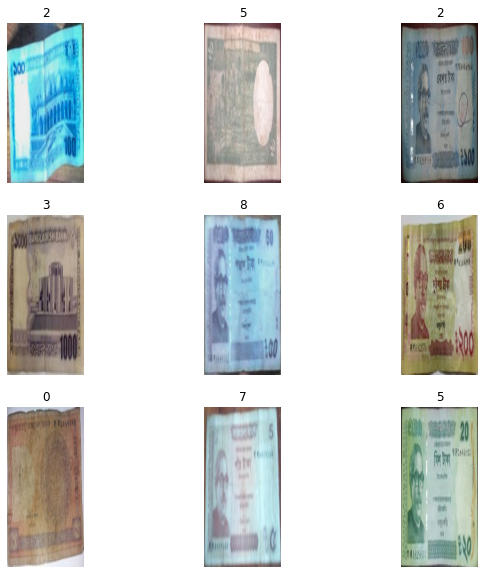

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
#data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

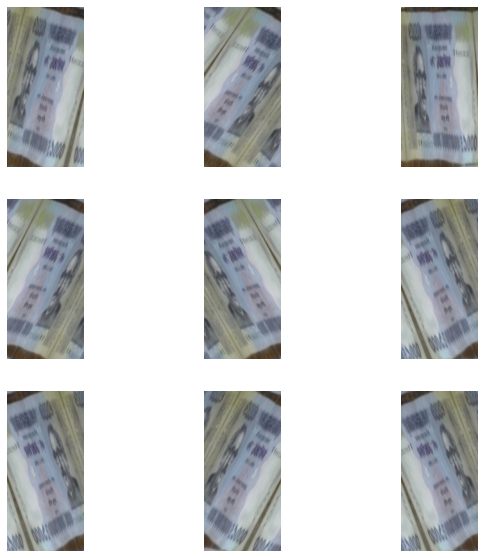

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# apply data_augmentation to the training images
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# prefetching samples in GPU memory helps maximize GPU utilization
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16

IMAGE_SIZE = [250, 120]

# loading the weights of VGG16 without the top layer. These weights are trained on imagenet dataset
vgg19 = keras.applications.vgg19
conv_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model.summary()

NameError: ignored

In [ ]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

In [ ]:
# putting the currency in a list
currency = ["1", "10", "100", "1000", "2", "20", "200", "5", "50", "500"]

In [ ]:
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import Audio

img_path = "/content/drive/MyDrive/dataset/testing/0.jpg"

#showing image of the testing data
testImg = mpimg.imread(img_path)
imshow(testImg)

img = keras.preprocessing.image.load_img(img_path, target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

predictions.argmax()
currency[predictions.argmax()]

#audio of testing data
if currency[predictions.argmax()] == '1':
  wn = Audio('/content/drive/MyDrive/dataset/audio/one.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '2':
  wn = Audio('/content/drive/MyDrive/dataset/audio/two.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '5':
  wn = Audio('/content/drive/MyDrive/dataset/audio/five.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '10':
  wn = Audio('/content/drive/MyDrive/dataset/audio/ten.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '20':
  wn = Audio('/content/drive/MyDrive/dataset/audio/twenty.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '50':
  wn = Audio('/content/drive/MyDrive/dataset/audio/fifty.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '100':
  wn = Audio('/content/drive/MyDrive/dataset/audio/onehundred.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '200':
  wn = Audio('/content/drive/MyDrive/dataset/audio/twohundred.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '500':
  wn = Audio('/content/drive/MyDrive/dataset/audio/fivehundred.mp3', autoplay=True)
  display(wn)
elif currency[predictions.argmax()] == '1000':
  wn = Audio('/content/drive/MyDrive/dataset/audio/thousand.mp3', autoplay=True)
  display(wn)
else:
  print("something wrong")

currency[predictions.argmax()]